In [1]:
from PIL import Image
import glob
image_list = []
for filename in glob.glob('*.tif'):
    im=Image.open(filename)
    image_list.append(im)

In [2]:
import SimpleITK as sitk
#from myshow import myshow, myshow3d
from downloaddata import fetch_data as fdata

ModuleNotFoundError: No module named 'downloaddata'

In [ ]:
import numpy as np

In [3]:
reader = sitk.ImageFileReader()
reader.SetImageIO("TIFFImageIO")
reader.SetFileName('classic.tif')
image = reader.Execute();

seg_con = sitk.ConnectedThreshold(image, seedList=[(50,50,1)],
                                  lower=100, upper=190)

In [4]:
import matplotlib.pyplot as plt
nda = sitk.GetArrayFromImage(seg_con)
print(nda.shape)
plt.imshow(nda[1,:,:])

(11, 101, 101)


In [5]:
nda = sitk.GetArrayFromImage(image)
print(nda.shape)
nda[1,:,:] = nda[1,:,:]/np.max(nda[1,:,:])
seg = sitk.GetArrayFromImage(seg_con)
tot = nda+seg
plt.imshow(tot[1,:,:])
plt.hist(nda[1,:,:].flatten())

(11, 101, 101)


NameError: name 'np' is not defined

In [6]:
myshow(image)

NameError: name 'myshow' is not defined

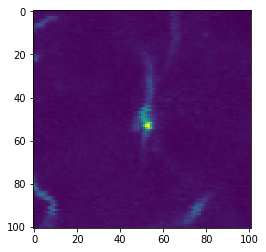

In [8]:
import numpy as np
fig, ax = plt.subplots()
ax.imshow(np.array(image_list[0]))
#ax.plot(50, 50, 'ro')
plt.show()

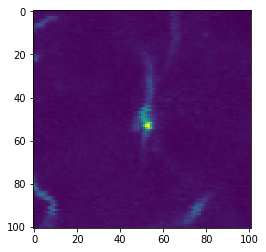

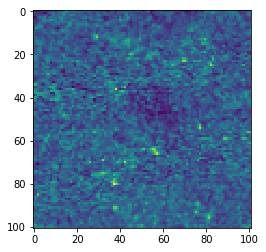

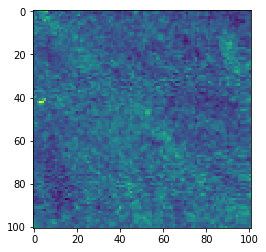

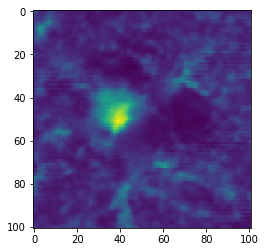

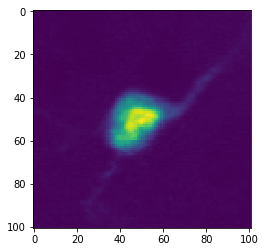

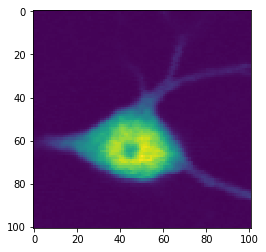

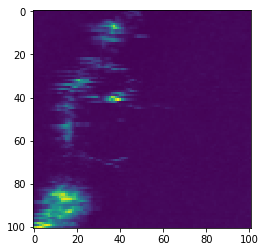

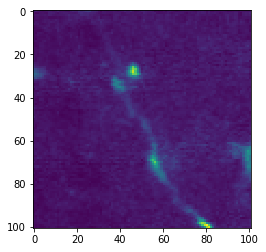

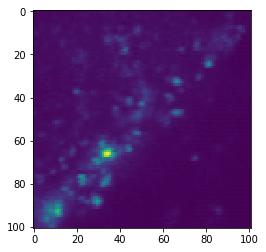

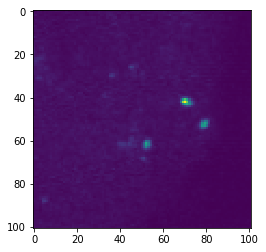

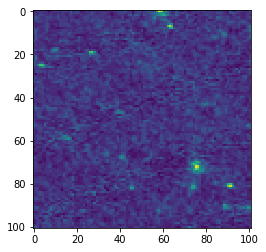

In [9]:
import numpy as np
for i in image_list:
    fig, ax = plt.subplots()
    ax.imshow(np.array(i))
#ax.plot(50, 50, 'ro')
plt.show()

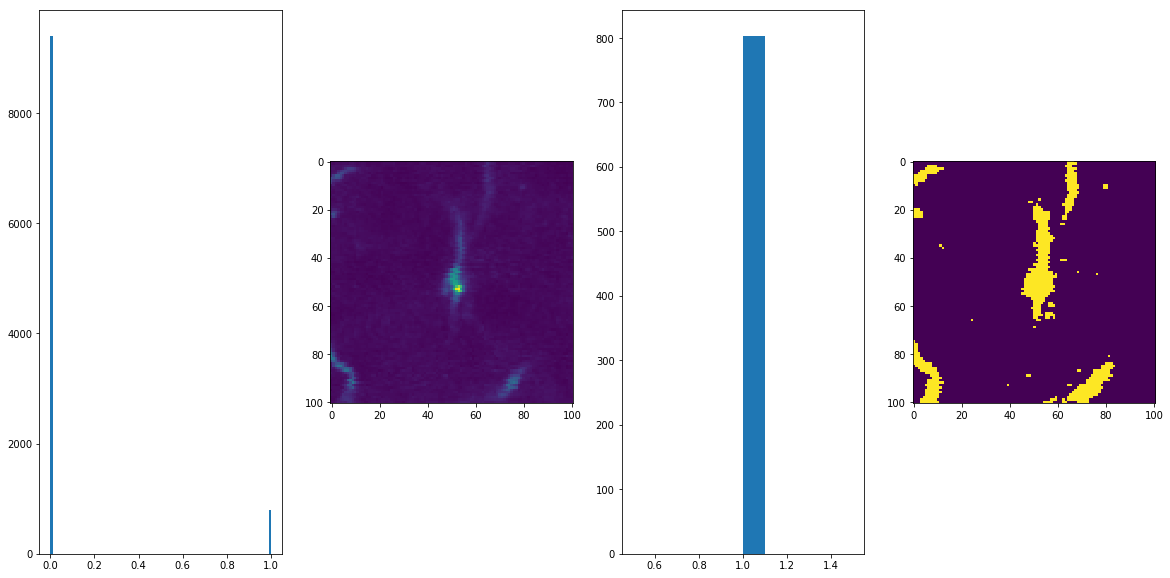

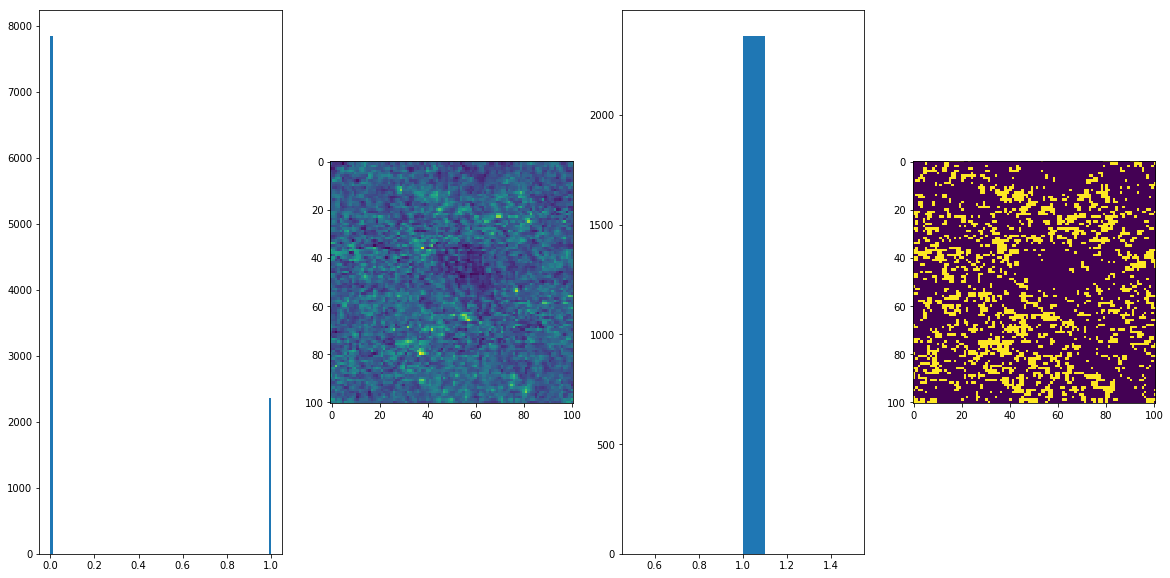

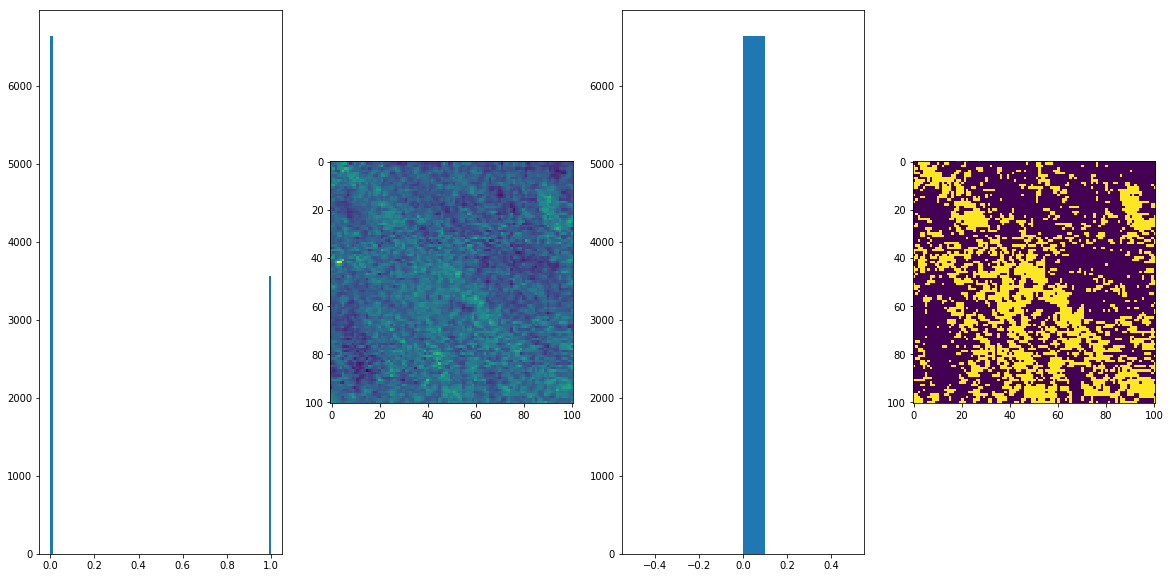

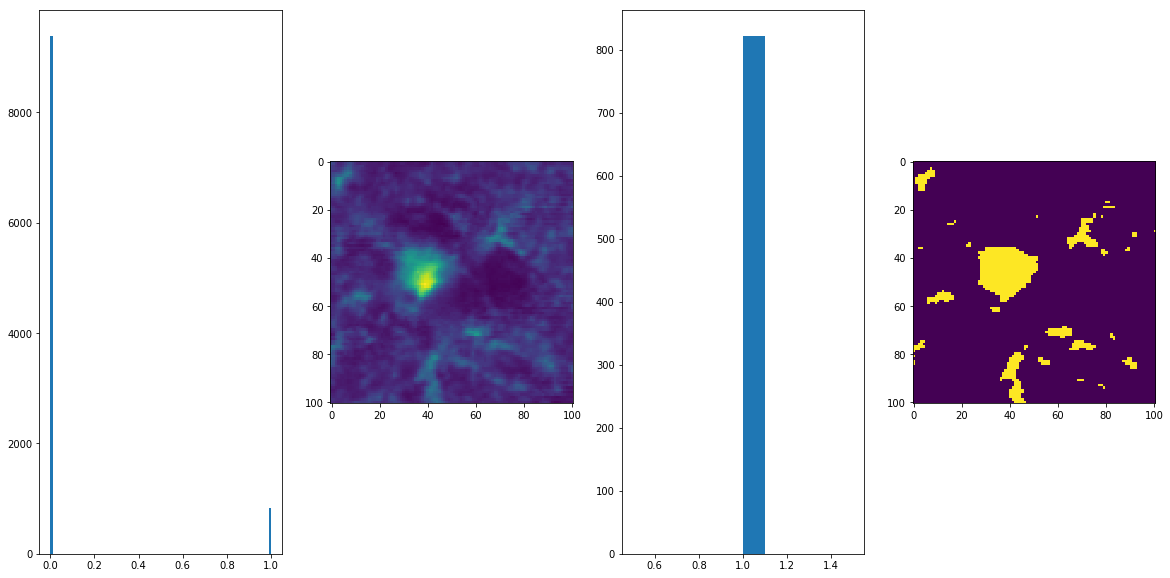

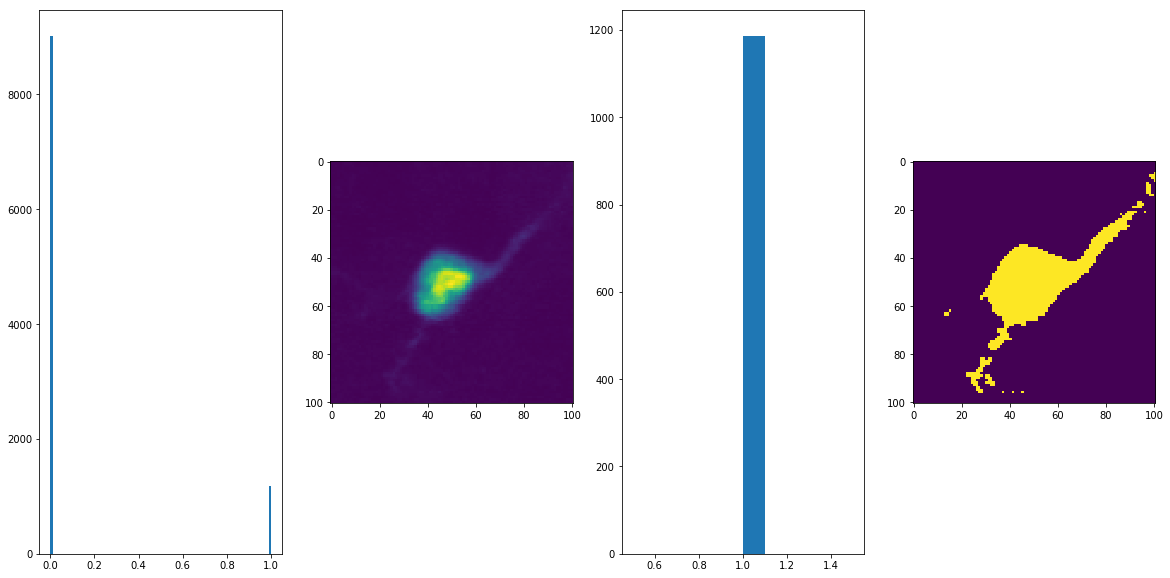

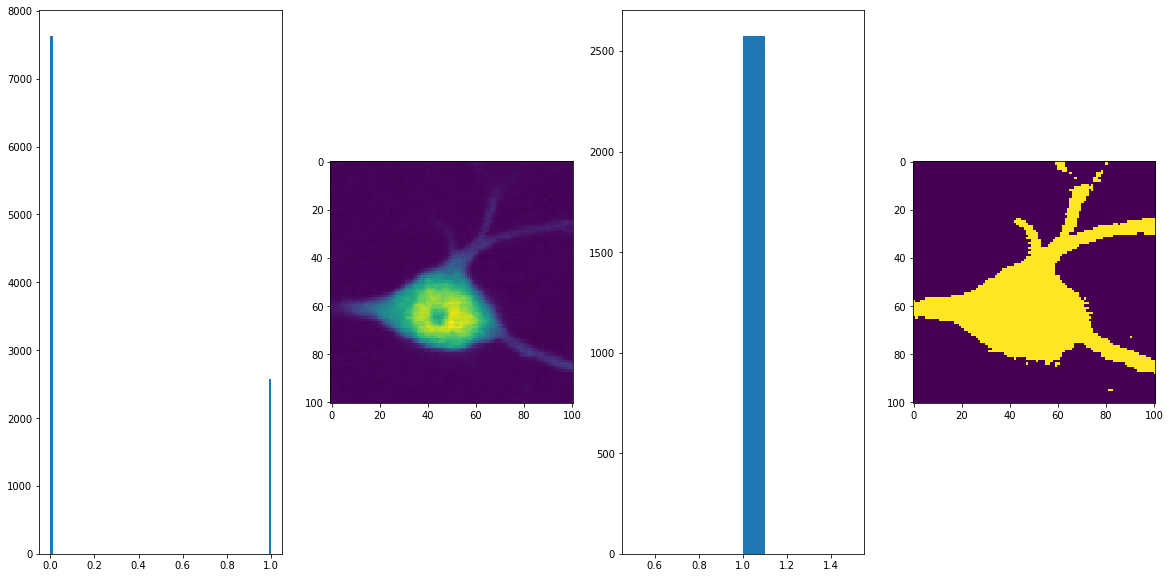

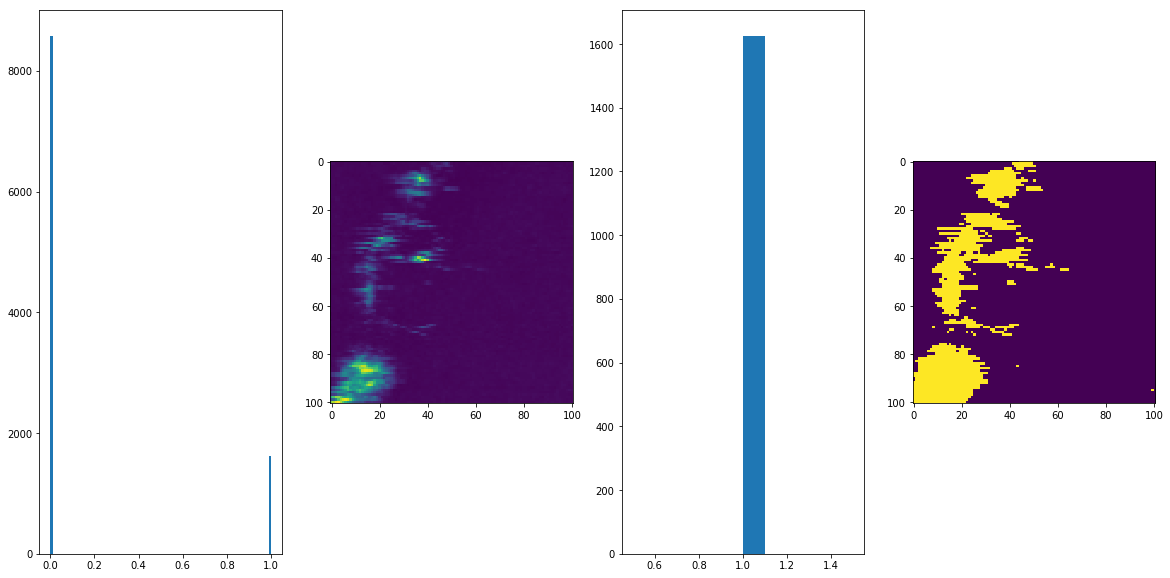

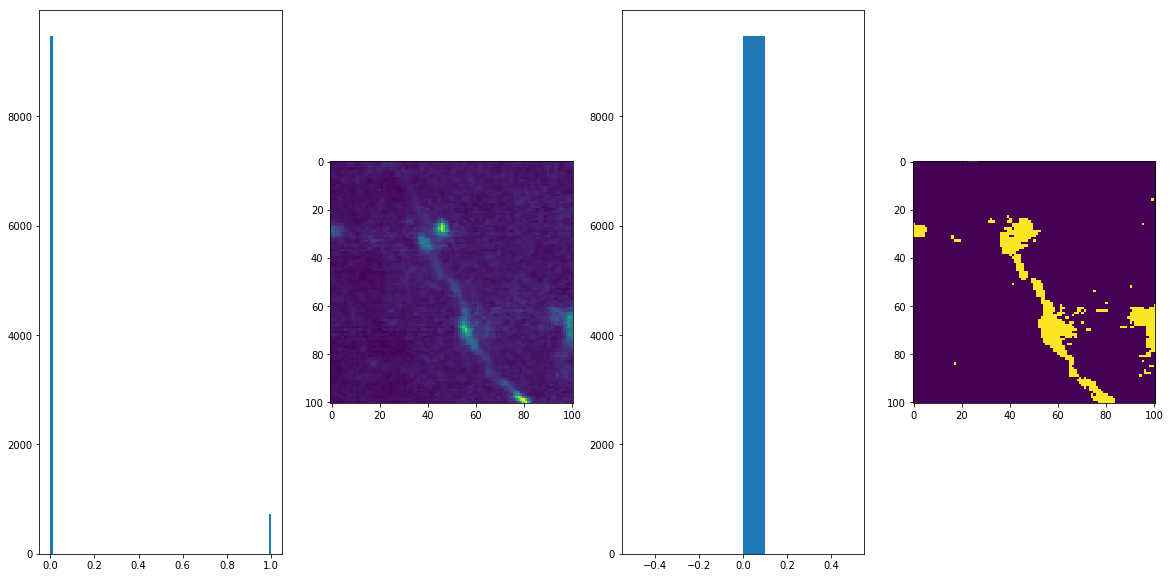

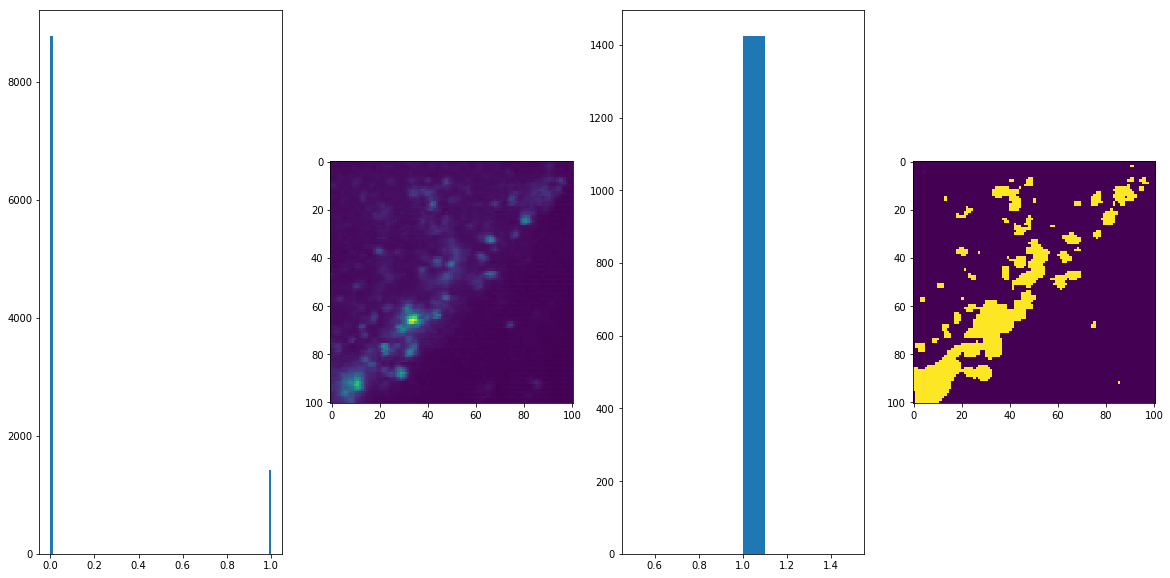

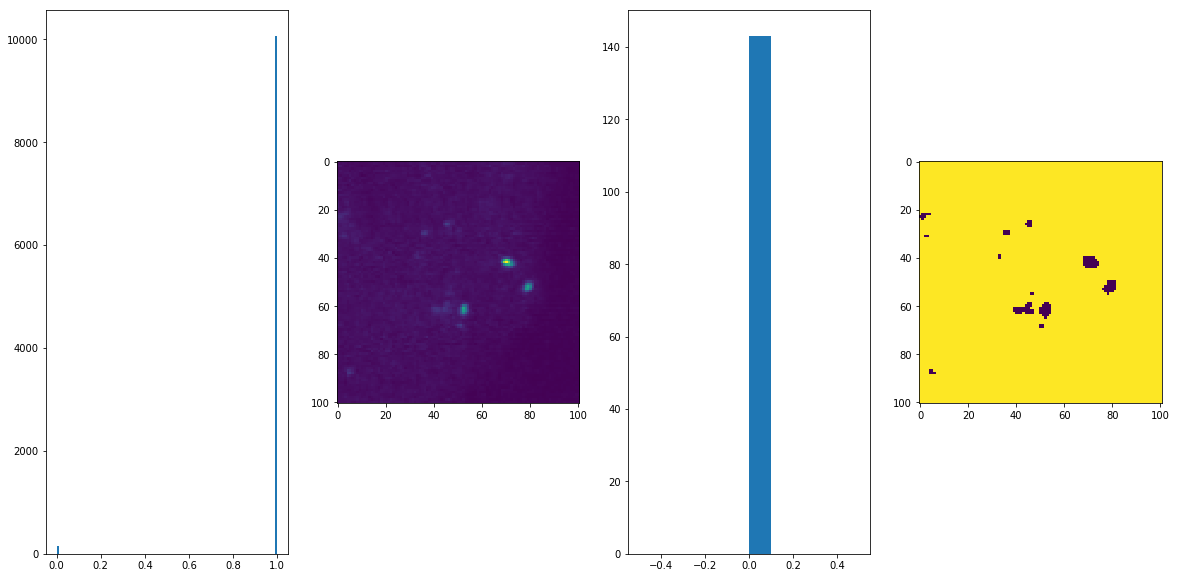

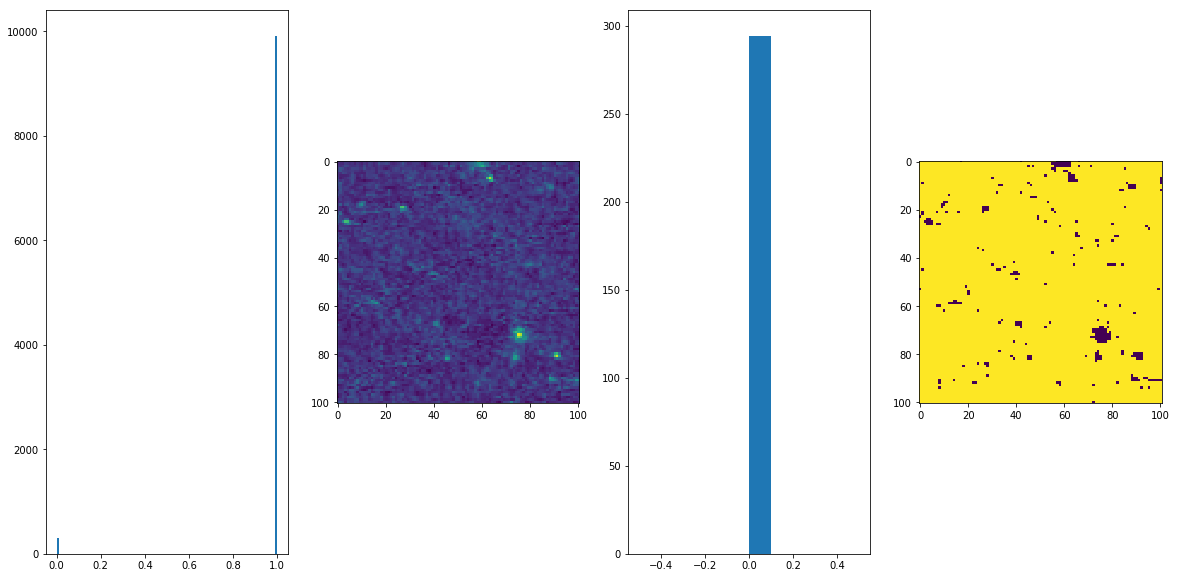

In [36]:
import matplotlib.pyplot as plt
for i in range(len(flats)):
    fig, ax = plt.subplots(1,4, figsize=(20,10))
    ax[0].hist(flats[i], 100)
    ax[1].imshow(np.array(image_list[i]))
    #isof = IsolationForest()
    #y = isof.fit_predict(flats[1].reshape(-1,1))
    gm = GaussianMixture(n_components=2)
    y = gm.fit_predict(flats[i].reshape(-1,1))
    ax[2].hist(flats[i][y==1])
    order = (np.mean(flats[i][y==0]) > np.mean(flats[i][y==1]))
    flats[i][y==0] = int(order)
    flats[i][y==1] = 1-int(order)
    im = flats[i].reshape(101,101)
    ax[3].imshow(im)
    plt.show()